[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhujisheng/learn_python/blob/master/10.音乐/2.十二平均律.ipynb)

[《Python应用实战》视频课程](https://study.163.com/course/courseMain.htm?courseId=1209533804&share=2&shareId=400000000624093)

# 十二平均律

难度：★★★☆☆

## 定律方法

在频率为f和2f的音之间，划分12份，每个音的频率是:

$f_i = 2^{i/12}\times{f}$

这种分割声音频率的方式，称为十二平均律。

在十二平均律中：

相邻的两个音的频率倍数关系为：$f_{n+1} = \sqrt[12]{2}\times{f_n}$，它们相差一个半音。

如果两个音的频率是两倍关系，它们相差一个八度。

![十二平均律](images/twelvetone.png)

#### 生成频率为440hz与880hz的声音

In [62]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

T = 1.0 # seconds
sr = 22050

A4 = librosa.tone(440,sr=sr,duration=T)
A5 = librosa.tone(880,sr=sr,duration=T)

# 播放A4，A5，以及A4与A5的混合音
audio = numpy.concatenate((A4,A5,(A4+A5)/2))
ipd.Audio(audio, rate=sr)

#### 按十二平均律生成的440-880hz之间的音

In [63]:
audio = A4

for i in range(12):
    f = 440.0*pow(2,(i+1)/12)
    a = librosa.tone(f,sr=sr,duration=T)
    audio = numpy.concatenate((audio,a))

ipd.Audio(audio, rate=sr)

## 钢琴键盘

![钢琴键盘](images/piano.JPG)

|键序|科学音调记号|频率 (赫兹)|
|----------|----------|----------|
|61(白)|A5|880.000|
|60(黑)|G♯5／A♭5|830.609|
|59(白)|G5|783.991|
|58(黑)|F♯5／G♭5|739.989|
|57(白)|F5|698.456|
|56(白)|E5|659.255|
|55(黑)|D♯5／E♭5|622.254|
|54(白)|D5|587.330|
|53(黑)|C♯5／D♭5|554.365|
|52(白)|C5|523.251|
|51(白)|B4|493.883|
|50(黑)|A♯4／B♭4|466.164|
|49(白)|A4 A440|440.000|
|48(黑)|G♯4／A♭4|415.305|
|47(白)|G4|391.995|
|46(黑)|F♯4／G♭4|369.994|
|45(白)|F4|349.228|
|44(白)|E4|329.628|
|43(黑)|D♯4／E♭4|311.127|
|42(白)|D4|293.665|
|41(黑)|C♯4／D♭4|277.183|
|40(白)|C4 中央C|261.626|
|39(白)|B3|246.942|
|38(黑)|A♯3／B♭3|233.082|
|37(白)|A3|220.000|


#### 记号与频率之间的转化

In [58]:
# A4
librosa.hz_to_note(440)

'A4'

In [59]:
# C4
librosa.note_to_hz('C4')

261.6255653005986

#### 唱名

In [64]:
DO = librosa.tone(librosa.note_to_hz('C4'),sr=sr,duration=1)
RI = librosa.tone(librosa.note_to_hz('D4'),sr=sr,duration=1)
MI = librosa.tone(librosa.note_to_hz('E4'),sr=sr,duration=1)
FA = librosa.tone(librosa.note_to_hz('F4'),sr=sr,duration=1)
SO = librosa.tone(librosa.note_to_hz('G4'),sr=sr,duration=1)
LA = librosa.tone(librosa.note_to_hz('A4'),sr=sr,duration=1)
XI = librosa.tone(librosa.note_to_hz('B4'),sr=sr,duration=1)
DO1 = librosa.tone(librosa.note_to_hz('C5'),sr=sr,duration=1)

audio = numpy.concatenate((DO,RI,MI,FA,SO,LA,XI,DO1))
ipd.Audio(audio, rate=sr)

## chroma时频谱图

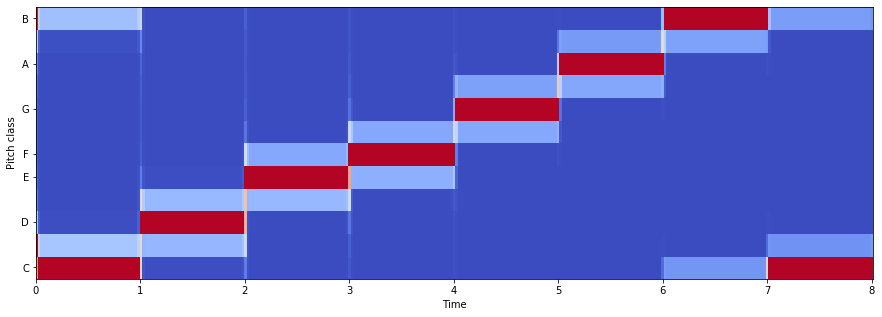

In [67]:
chromagram = librosa.feature.chroma_stft(audio, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

加载钢琴弹奏声音

In [69]:
x, sr = librosa.load('audio/simple_piano.wav')
ipd.Audio(x, rate=sr)

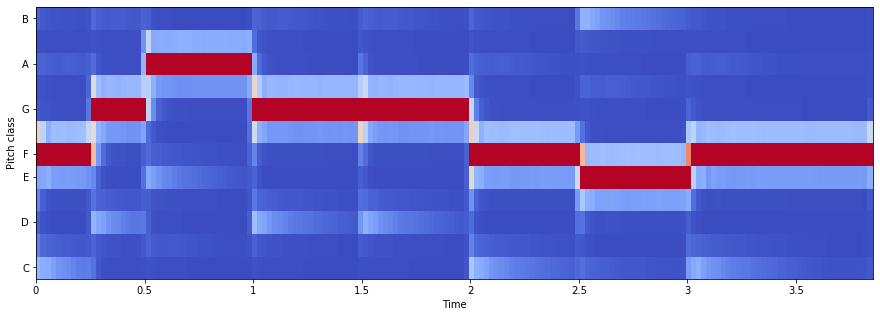

In [70]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

## 声音单调性

- 强度无时间变化

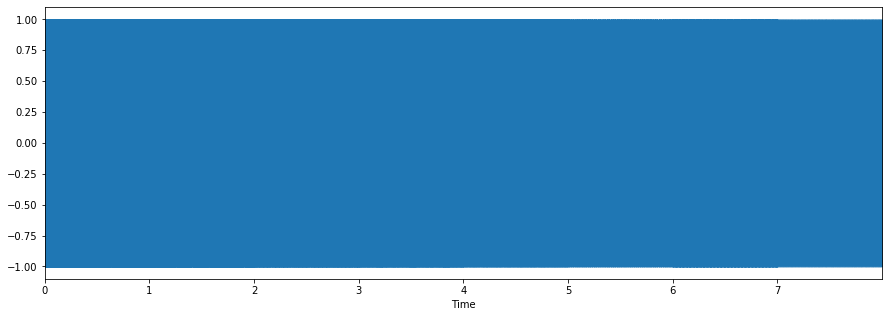

In [71]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(audio, sr)
plt.show()

- 在任何时间点上频率单一

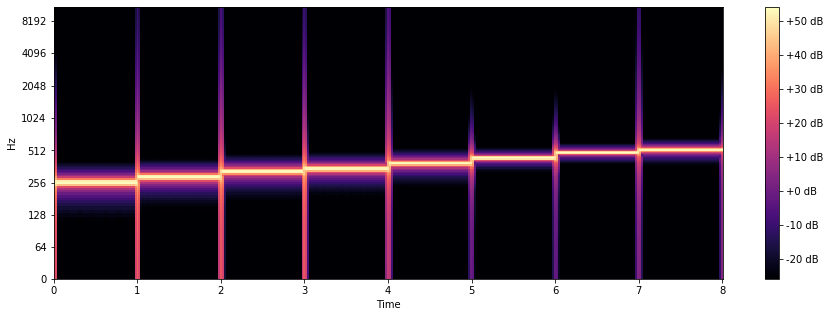

In [72]:
# 时频谱图
hop_length = 512
n_fft = 2048
X = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)

S = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.show()

参考：[纯率](https://baike.baidu.com/item/纯律/659996)